# HW3 Support Vector Machine and Decision Trees

# Due on 11/30 23:59 pm

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
# from mlxtend.plotting import plot_decision_regions

## We will use the same affair dataset from HW2, but will skip the EDA phrase we have done enough of it

#### Everything removing outliers, create dummies variabes had been done for you

In [3]:
# Remember the affair data set from HW3, we will use that dataset again
# but we will directly load from file
orig_df = pd.read_csv("affairs2.csv")
# Set up our target class label
orig_df['had_affair'] = orig_df['affairs'].apply(lambda x: 1 if x != 0 else 0)
orig_df = orig_df.drop('affairs',axis=1)
# remove NA
orig_df.dropna(inplace=True)
# create dummies variable for occupation
occ = pd.get_dummies(orig_df['occupation'],drop_first=True)
# we include rate_marriage feature as well. In HW3, we did not include that variable
features = ['rate_marriage','age','yrs_married','children','religious','educ', 'had_affair']
df = orig_df
df = pd.concat([orig_df[features], occ], axis=1)
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,had_affair,occ2,occ3,occ4,occ5,occ6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,1,0,0,0,0
1,3.0,27.0,13.0,3.0,1.0,14.0,1,0,1,0,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1,0,1,0,0,0
3,4.0,37.0,16.5,4.0,3.0,16.0,1,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,1,0,1,0,0,0


In [35]:
df[df['had_affair']==1].shape

(2053, 12)

In [32]:
df.shape

(6366, 12)

In [4]:
# make sure there is no missing values
df.isnull().sum()

rate_marriage    0
age              0
yrs_married      0
children         0
religious        0
educ             0
had_affair       0
occ2             0
occ3             0
occ4             0
occ5             0
occ6             0
dtype: int64

### Now we are ready to build models

### Question 1: Build a classification model using SVC using linear kernel with usual steps

In [5]:
#Call Train test split
x_train, x_test, y_train, y_test = train_test_split(df.drop('had_affair',axis=1), df.had_affair, test_size=0.2, random_state=0)

In [47]:
y_test[lambda x: x == 1].shape

(389,)

In [26]:
#import the model from sklearn import svm, create the SVC object 
model = svm.SVC(kernel='linear', C=1, random_state=0)

#print out model performance
model.fit(x_train,y_train)

y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.93      0.84       885
           1       0.68      0.33      0.44       389

    accuracy                           0.75      1274
   macro avg       0.72      0.63      0.64      1274
weighted avg       0.73      0.75      0.72      1274

0.7472527472527473


### Question 2. Now try different value of C-parameter and rerun your model

In [7]:
# Try C = 2**-5 and 2**5
model = svm.SVC(kernel='linear', C=2**-5, random_state=0)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.94      0.84       885
           1       0.69      0.32      0.43       389

    accuracy                           0.75      1274
   macro avg       0.72      0.63      0.64      1274
weighted avg       0.74      0.75      0.71      1274

0.7480376766091051


In [8]:
# Try C = 2**-5 and 2**5
model = svm.SVC(kernel='linear', C=2**5, random_state=0)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.93      0.84       885
           1       0.68      0.33      0.44       389

    accuracy                           0.75      1274
   macro avg       0.72      0.63      0.64      1274
weighted avg       0.73      0.75      0.72      1274

0.7472527472527473


### Question 3. Try using rbf as your kernel and use Gamma of 2**-5, 0.1, 1 and 2

In [9]:
model = svm.SVC(kernel='rbf', C=1, gamma=2**-5)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.93      0.83       885
           1       0.66      0.31      0.42       389

    accuracy                           0.74      1274
   macro avg       0.71      0.62      0.63      1274
weighted avg       0.72      0.74      0.71      1274

0.7401883830455259


In [10]:
model = svm.SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82       885
           1       0.60      0.31      0.41       389

    accuracy                           0.73      1274
   macro avg       0.68      0.61      0.62      1274
weighted avg       0.71      0.73      0.70      1274

0.7276295133437991


In [11]:
model = svm.SVC(kernel='rbf', C=1, gamma=1)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.88      0.80       885
           1       0.48      0.25      0.33       389

    accuracy                           0.69      1274
   macro avg       0.61      0.57      0.57      1274
weighted avg       0.65      0.69      0.66      1274

0.6891679748822606


In [12]:
model = svm.SVC(kernel='rbf', C=1, gamma=2)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.89      0.79       885
           1       0.38      0.15      0.21       389

    accuracy                           0.67      1274
   macro avg       0.54      0.52      0.50      1274
weighted avg       0.60      0.67      0.61      1274

0.6656200941915228


### Question 4. So out of all the models you try in Question 2 and 3, what is the best choice for the kernel, C and gamma parameters?

* Linear kernel perform better than rbf.
* In terms of the f1 score, best C is above 1. C=2**5 give the same result as C=1.
* Best gamma is around 2**-5. large gamma tends to overfit the data.

# Now we will try to fit the same dataset with Decision Trees

### Question 5. Build a Decision Tree Classifier using default parameter

In [14]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.81      0.77       885
           1       0.43      0.34      0.38       389

    accuracy                           0.66      1274
   macro avg       0.58      0.57      0.57      1274
weighted avg       0.64      0.66      0.65      1274

0.6632653061224489


### Question 6. Now try using max_depth = 2, 3, 4 and crierion = 'gini' and 'entropy' to build 3 X 2 = 6 different models

In [15]:
model = DecisionTreeClassifier(max_depth=2, criterion='gini')
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.92      0.83       885
           1       0.65      0.32      0.43       389

    accuracy                           0.74      1274
   macro avg       0.70      0.62      0.63      1274
weighted avg       0.72      0.74      0.71      1274

0.7401883830455259


In [16]:
model = DecisionTreeClassifier(max_depth=2, criterion='entropy')
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.92      0.83       885
           1       0.65      0.32      0.43       389

    accuracy                           0.74      1274
   macro avg       0.70      0.62      0.63      1274
weighted avg       0.72      0.74      0.71      1274

0.7401883830455259


In [17]:
model = DecisionTreeClassifier(max_depth=3, criterion='gini')
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.93      0.83       885
           1       0.66      0.29      0.40       389

    accuracy                           0.74      1274
   macro avg       0.70      0.61      0.61      1274
weighted avg       0.72      0.74      0.70      1274

0.7362637362637363


In [18]:
model = DecisionTreeClassifier(max_depth=3, criterion='entropy')
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.93      0.83       885
           1       0.66      0.29      0.40       389

    accuracy                           0.74      1274
   macro avg       0.70      0.61      0.61      1274
weighted avg       0.72      0.74      0.70      1274

0.7362637362637363


In [19]:
model = DecisionTreeClassifier(max_depth=4, criterion='gini')
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.92      0.83       885
           1       0.65      0.32      0.43       389

    accuracy                           0.74      1274
   macro avg       0.70      0.62      0.63      1274
weighted avg       0.72      0.74      0.71      1274

0.7394034536891679


In [20]:
model = DecisionTreeClassifier(max_depth=4, criterion='entropy')
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.92      0.83       885
           1       0.65      0.32      0.43       389

    accuracy                           0.74      1274
   macro avg       0.70      0.62      0.63      1274
weighted avg       0.72      0.74      0.71      1274

0.7394034536891679


### Question 7. What is your obsevation from Question 6? Does the choice of the criterion important in this case? What about the max_depth? What is the best choice of max_depth and criterion?

* For the same max_depth, regardless choosing gini or entropy, the result are the same. Choice of criterion is not important in this case.

* The max_depth is the best when choose 2. at 3 it's the worst, at 4 the result becomes better, but not as good as when max_depth is 2.

* Best max_depth is 2.
* Best criterion are both gini and entropy.

## Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:

In [21]:
df.columns

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'had_affair', 'occ2', 'occ3', 'occ4', 'occ5', 'occ6'],
      dtype='object')

In [22]:
features

['rate_marriage',
 'age',
 'yrs_married',
 'children',
 'religious',
 'educ',
 'had_affair']

In [23]:
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import io
import pydot 

# Pick up all featurs columns from your data frame
features = list(df.drop(['had_affair'],axis=1).columns)
features

['rate_marriage',
 'age',
 'yrs_married',
 'children',
 'religious',
 'educ',
 'occ2',
 'occ3',
 'occ4',
 'occ5',
 'occ6']

### Question 8, now pick three models, with max_depth = 2, 3 and 4. You can pick the which ever criterions you want and visual the three trees

* First of all, the sklearn.externals.six is deprecated. The only way to use it is to downgrade sklearn, which would have other impact on my system.
* Second, My computer has problems with the package export_graphviz. The error can not be resolved.
* Therefore, I found a newer package to plot the tree as I showed below.

In [1]:
from sklearn import tree

[Text(390.6, 317.09999999999997, 'X[0] <= 3.5\ngini = 0.44\nsamples = 5092\nvalue = [3428, 1664]'),
 Text(195.3, 190.26, 'X[2] <= 4.25\ngini = 0.487\nsamples = 1163\nvalue = [486, 677]'),
 Text(97.65, 63.420000000000016, 'gini = 0.495\nsamples = 302\nvalue = [166, 136]'),
 Text(292.95000000000005, 63.420000000000016, 'gini = 0.467\nsamples = 861\nvalue = [320, 541]'),
 Text(585.9000000000001, 190.26, 'X[2] <= 4.25\ngini = 0.376\nsamples = 3929\nvalue = [2942, 987]'),
 Text(488.25, 63.420000000000016, 'gini = 0.245\nsamples = 1609\nvalue = [1379, 230]'),
 Text(683.5500000000001, 63.420000000000016, 'gini = 0.44\nsamples = 2320\nvalue = [1563, 757]')]

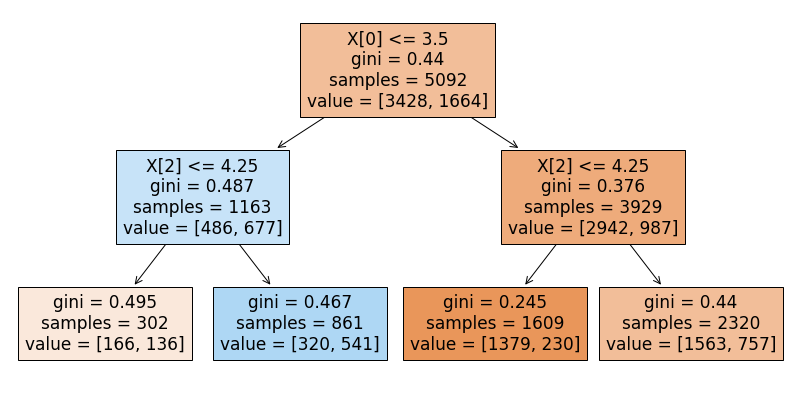

In [93]:
fig = plt.figure(figsize=(14,7))
m1 = DecisionTreeClassifier(max_depth=2, criterion='gini')
m1.fit(x_train, y_train)
tree.plot_tree(m1, filled=True)

[Text(697.5, 380.52, 'X[0] <= 3.5\ngini = 0.44\nsamples = 5092\nvalue = [3428, 1664]'),
 Text(348.75, 271.8, 'X[2] <= 4.25\ngini = 0.487\nsamples = 1163\nvalue = [486, 677]'),
 Text(174.375, 163.07999999999998, 'X[2] <= 1.5\ngini = 0.495\nsamples = 302\nvalue = [166, 136]'),
 Text(87.1875, 54.360000000000014, 'gini = 0.298\nsamples = 22\nvalue = [18, 4]'),
 Text(261.5625, 54.360000000000014, 'gini = 0.498\nsamples = 280\nvalue = [148, 132]'),
 Text(523.125, 163.07999999999998, 'X[6] <= 0.5\ngini = 0.467\nsamples = 861\nvalue = [320, 541]'),
 Text(435.9375, 54.360000000000014, 'gini = 0.453\nsamples = 726\nvalue = [252, 474]'),
 Text(610.3125, 54.360000000000014, 'gini = 0.5\nsamples = 135\nvalue = [68, 67]'),
 Text(1046.25, 271.8, 'X[2] <= 4.25\ngini = 0.376\nsamples = 3929\nvalue = [2942, 987]'),
 Text(871.875, 163.07999999999998, 'X[0] <= 4.5\ngini = 0.245\nsamples = 1609\nvalue = [1379, 230]'),
 Text(784.6875, 54.360000000000014, 'gini = 0.32\nsamples = 664\nvalue = [531, 133]'),
 T

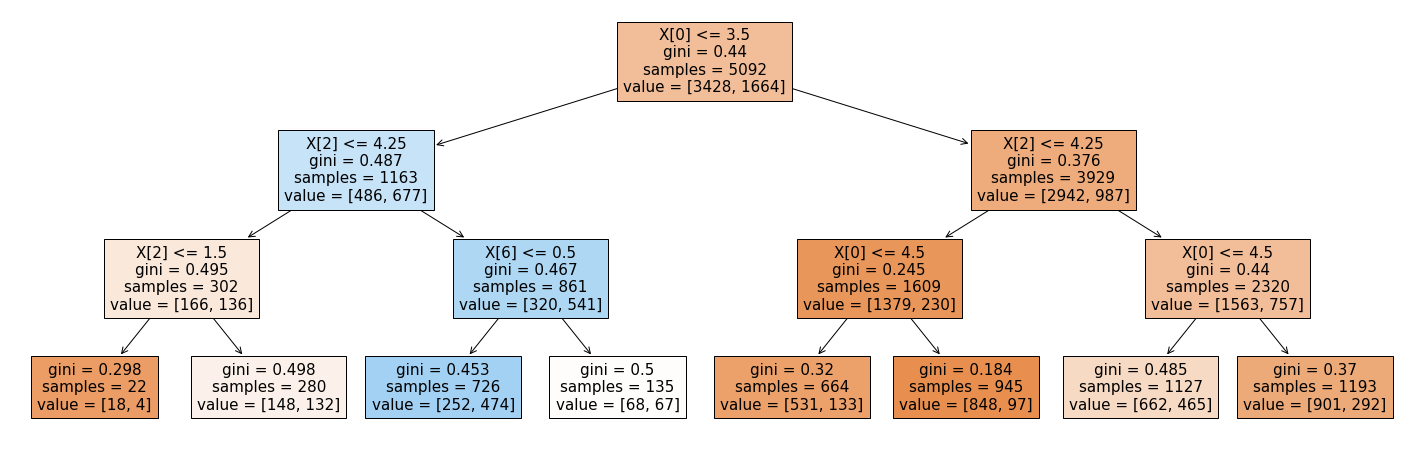

In [88]:
fig = plt.figure(figsize=(25,8))
m2 = DecisionTreeClassifier(max_depth=3, criterion='gini')
m2.fit(x_train, y_train)
tree.plot_tree(m2, filled=True)

[Text(976.5, 636.012, 'X[0] <= 3.5\ngini = 0.44\nsamples = 5092\nvalue = [3428, 1664]'),
 Text(488.25, 494.676, 'X[2] <= 4.25\ngini = 0.487\nsamples = 1163\nvalue = [486, 677]'),
 Text(244.125, 353.34, 'X[2] <= 1.5\ngini = 0.495\nsamples = 302\nvalue = [166, 136]'),
 Text(122.0625, 212.00400000000002, 'X[4] <= 1.5\ngini = 0.298\nsamples = 22\nvalue = [18, 4]'),
 Text(61.03125, 70.668, 'gini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(183.09375, 70.668, 'gini = 0.0\nsamples = 16\nvalue = [16, 0]'),
 Text(366.1875, 212.00400000000002, 'X[1] <= 29.5\ngini = 0.498\nsamples = 280\nvalue = [148, 132]'),
 Text(305.15625, 70.668, 'gini = 0.5\nsamples = 267\nvalue = [137, 130]'),
 Text(427.21875, 70.668, 'gini = 0.26\nsamples = 13\nvalue = [11, 2]'),
 Text(732.375, 353.34, 'X[6] <= 0.5\ngini = 0.467\nsamples = 861\nvalue = [320, 541]'),
 Text(610.3125, 212.00400000000002, 'X[4] <= 2.5\ngini = 0.453\nsamples = 726\nvalue = [252, 474]'),
 Text(549.28125, 70.668, 'gini = 0.424\nsamples = 410\nva

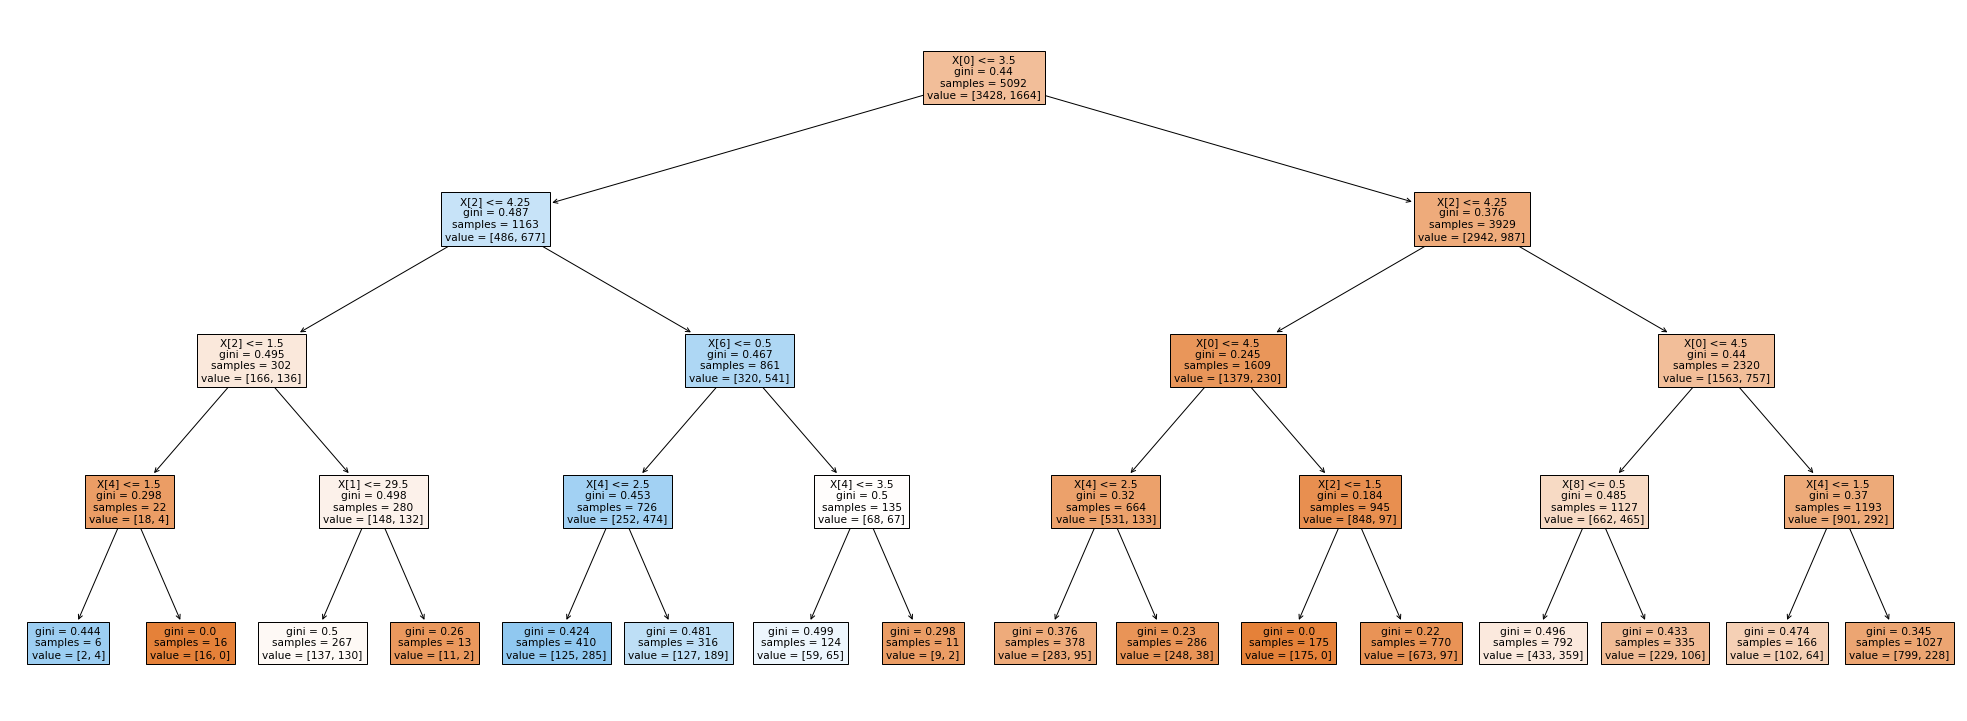

In [89]:
fig = plt.figure(figsize=(35,13))
m3 = DecisionTreeClassifier(max_depth=4, criterion='gini')
m3.fit(x_train, y_train)
tree.plot_tree(m3, filled=True)

### Question 9. Now build a Random Forest Classifier with, say, 100 trees. Check the model performance 

In [64]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)

rfc_pred = rfc.predict(x_test)
print(classification_report(y_test, rfc_pred))
print(accuracy_score(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.75      0.81      0.78       885
           1       0.48      0.39      0.43       389

    accuracy                           0.68      1274
   macro avg       0.62      0.60      0.61      1274
weighted avg       0.67      0.68      0.67      1274

0.6844583987441131


* The f1-score shows that the random forest doesn't improve the result much. Also the accuracy is not the best amoung all the models.

* This is the end of the report.